# Create datasets for model validation

This dataset should include mice of all different sizes (smallest to largest).

In [1]:
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
from toolz import valmap
import matplotlib.pyplot as plt

## Female version

In [2]:
path = Path('/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_females')
training_data_path = Path('/n/groups/datta/win/longtogeny/data/size_network/training_data')

In [3]:
def zscore(df):
    return (df - df.mean()) / df.std()

In [4]:
files = sorted(path.glob('**/results_00.h5'))

In [22]:
# open the files, get width/length/height of all sessions
morph_stats = []
for file in tqdm(files):
    with h5py.File(file, 'r') as h5f:
        a = h5f['scalars/area_mm']
        morph_stats.append(dict(
            file=str(file),
            age=Path(file).parents[2].name,
            mean_area=np.nanmean(a),
            median_area=np.nanmedian(a),
        ))
morph_stats = pd.DataFrame(morph_stats)

  0%|          | 0/192 [00:00<?, ?it/s]

In [26]:
morph_stats.sort_values(by='median_area')

,file,age,mean_area,median_area
80,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,3wks,371.475800,360.489197
88,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,3wks,407.777710,398.006165
86,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,3wks,419.690430,408.580750
76,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,3wks,433.033203,422.473755
78,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,3wks,424.097321,422.778534
...,...,...,...,...
38,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,18months,1045.323486,1044.389526
3,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,12months,1051.986450,1045.511108
28,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,18months,1057.535034,1050.411865
24,/home/wg41/groups/Dana/Ontogeny/raw_data/Ontog...,18months,1060.546753,1054.653198


In [36]:
avg_stat = morph_stats.groupby('age').median_area.mean().sort_values()

In [37]:
avg_stat

age
3wks        498.264496
5wks        595.463745
7wks        671.005554
9wks        676.560974
3months     779.966797
6months     837.250244
12months    936.995789
18months    981.852478
Name: median_area, dtype: float32

In [ ]:
avg_stat / avg_stat['9wks']

age
3wks        0.736467
5wks        0.880133
7wks        0.991789
9wks        1.000000
3months     1.152840
6months     1.237509
12months    1.384939
18months    1.451240
Name: median_area, dtype: float32

In [58]:
inds = dict(map(reversed, enumerate(avg_stat.index)))
inds = valmap(lambda x: x / max(inds.values()), inds)

In [71]:
selected = []
for grp, _df in morph_stats.groupby('age'):
    _idx = int(len(_df) * inds[grp])
    if _idx == len(_df):
        _idx -= 2
    selected.extend(_df.sort_values(by='median_area').iloc[_idx:_idx+2]['file'])

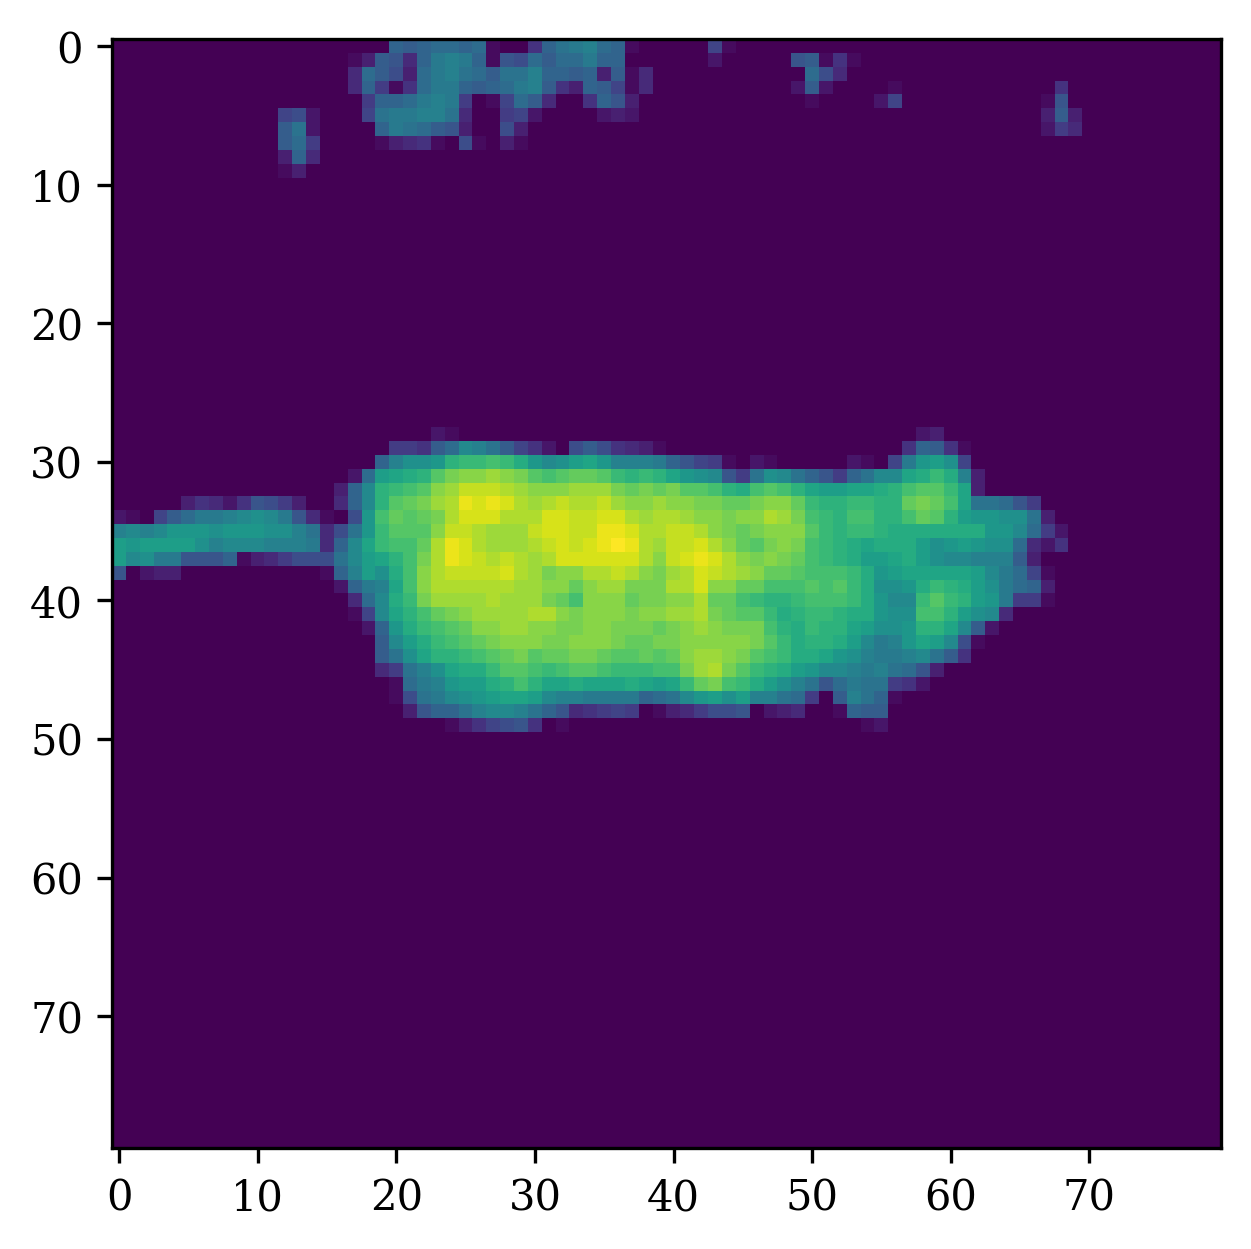

In [78]:
fig = plt.figure()
fig.dpi = 150
with h5py.File(selected[2], 'r') as h5f:
    plt.imshow(h5f['frames'][100])

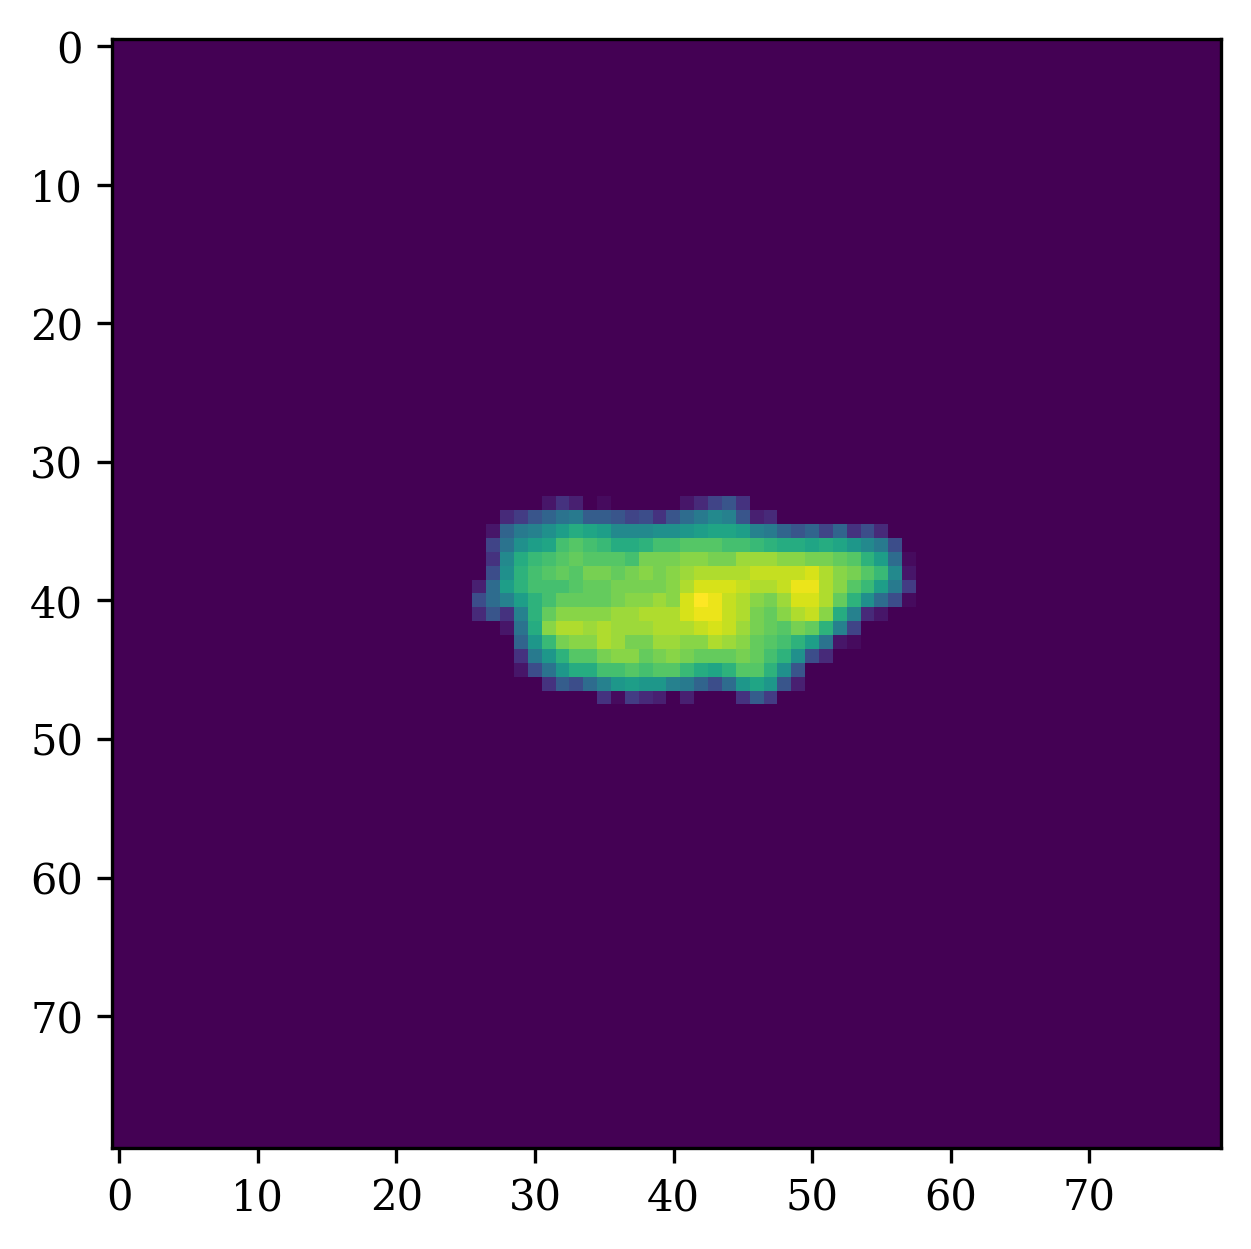

In [77]:
fig = plt.figure()
fig.dpi = 150
with h5py.File(selected[6], 'r') as h5f:
    plt.imshow(h5f['frames'][100])

In [79]:
with h5py.File('/n/groups/datta/win/longtogeny/data/size_network/female_ontogeny_validation.h5', 'w') as h5f:
    for file in tqdm(selected):
        folder = '_'.join(x.name for x in Path(file).parents[1:3])
        with h5py.File(file, 'r') as in_h5f:
            h5f.create_dataset(f'data/{folder}', data=in_h5f['frames'][()], compression='gzip')

  0%|          | 0/16 [00:00<?, ?it/s]

In [80]:
with h5py.File('/n/groups/datta/win/longtogeny/data/size_network/female_ontogeny_rw_preds.h5', 'w') as h5f:
    for file in tqdm(selected):
        folder = '_'.join(x.name for x in Path(file).parents[1:3])
        with h5py.File(file, 'r') as in_h5f:
            if 'size_normalized_frames' in in_h5f:
                h5f.create_dataset(f'data/{folder}', data=in_h5f['size_normalized_frames'][()], compression='gzip')
            else:
                print('No size_normalized_frames')

  0%|          | 0/16 [00:00<?, ?it/s]

No size_normalized_frames
No size_normalized_frames


## Male version

In [2]:
path = Path('/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males')
training_data_path = Path('/n/groups/datta/win/longtogeny/data/size_network/training_data')

In [3]:
files = sorted(path.glob('**/results_00.h5'))

In [4]:
# open the files, get width/length/height of all sessions
morph_stats = []
for file in tqdm(files):
    with h5py.File(file, 'r') as h5f:
        a = h5f['scalars/area_mm']
        morph_stats.append(dict(
            file=str(file),
            age=Path(file).parents[2].name,
            mean_area=np.nanmean(a),
            median_area=np.nanmedian(a),
        ))
morph_stats = pd.DataFrame(morph_stats)

  0%|          | 0/192 [00:00<?, ?it/s]

In [7]:
avg_stat = morph_stats.groupby('age').median_area.mean().sort_values()
avg_stat / avg_stat['3months_19042021']

age
3wks_02112021        0.568178
5wks_02112021        0.775892
9wks_1811_2021       0.870533
7wks_18112021        0.893014
3months_19042021     1.000000
9months_060923       1.088633
6months_20042021     1.147415
12months_28042021    1.298850
18months_29042021    1.405200
22months_06052023    1.452438
Name: median_area, dtype: float32

In [7]:
inds = dict(map(reversed, enumerate(avg_stat.index)))
inds = valmap(lambda x: x / max(inds.values()), inds)

In [8]:
selected = []
for grp, _df in morph_stats.groupby('age'):
    _idx = int(len(_df) * inds[grp])
    if _idx == len(_df):
        _idx -= 2
    selected.extend(_df.sort_values(by='median_area').iloc[_idx:_idx+2]['file'])

In [9]:
with h5py.File('/n/groups/datta/win/longtogeny/data/size_network/male_ontogeny_validation.h5', 'w') as h5f:
    for file in tqdm(selected):
        folder = '_'.join(x.name for x in Path(file).parents[1:3])
        with h5py.File(file, 'r') as in_h5f:
            h5f.create_dataset(f'data/{folder}', data=in_h5f['frames'][()], compression='gzip')

  0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
selected

['/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/12months_28042021/session_20210428134015/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/12months_28042021/session_20210428142014/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/18months_29042021/session_20210429130503/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/18months_29042021/session_20210429122136/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/22months_06052023/session_20230605122637/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/22months_06052023/session_20230605122631/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/3months_19042021/session_20210419135601/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data/Ontogeny_males/3months_19042021/session_20210419130121/proc/results_00.h5',
 '/home/wg41/groups/Dana/Ontogeny/raw_data